# Example of GraphEvolution use (Hasse diagram of the poset of partitions of an integer)

The following cell defines methods to compute the Hasse diagram of the poset of partitions of an integer. Equivalently, this is the poset of nilpotent orbits of the complex simple Lie algebra of type A_n.

In [1]:
def partitions(n):
    """Returns a list of all partitions of the integer `n`.
    """
    p = []
    a = [0 for i in range(n)]
    a[0] = n
    p.append(tuple(a))
    while a[n - 1] == 0:
        i = n - 1
        while a[i] < 2:
            i -= 1
        a[i] -= 1
        i += 1
        while i < n:
            a[i] = min(a[i - 1], n - sum(a[: i]))
            i += 1
        p.append(tuple(a))
    return p

def less_than(p, q):
    """Partial order on the set of partitions"""
    a = 0
    b = 0
    for i in range(len(p)):
        a += p[i]
        b += q[i]
        if a > b:
            return False
    return True

def poset(n):
    """Returns the poset of the set of partitions of `n`"""
    p = partitions(n)
    edges = []
    for i in range(len(p)):
        for j in range(i + 1, len(p)):
            if less_than(p[i], p[j]):
                edges.append((i, j))
            elif less_than(p[j], p[i]):
                edges.append((j, i))
    return edges

def poset_to_hasse(p):
    """Convert the poset into a Hasse diagram"""
    h = []
    for e in p:
        isok = True
        for i in range(len(p)):
            if ((i != e[0]) and (i != e[1]) and ((e[0], i) in p) and ((i, e[1]) in p)):
                isok = False
                break
        if isok:
            h.append(e)
    return h

def hasse(n):
    """Returns the Hasse diagram of the poset of partitions of `n`"""
    return poset_to_hasse(poset(n))

Now, use `graphevolution` to display the result neatly.

In [2]:
%matplotlib notebook
import matplotlib.animation
import matplotlib.pyplot as plt
import graphevolution as ge

Take `n = 10` for example:

In [3]:
g = ge.Graph()
g.set_by_edges(hasse(10))

<IPython.core.display.Javascript object>


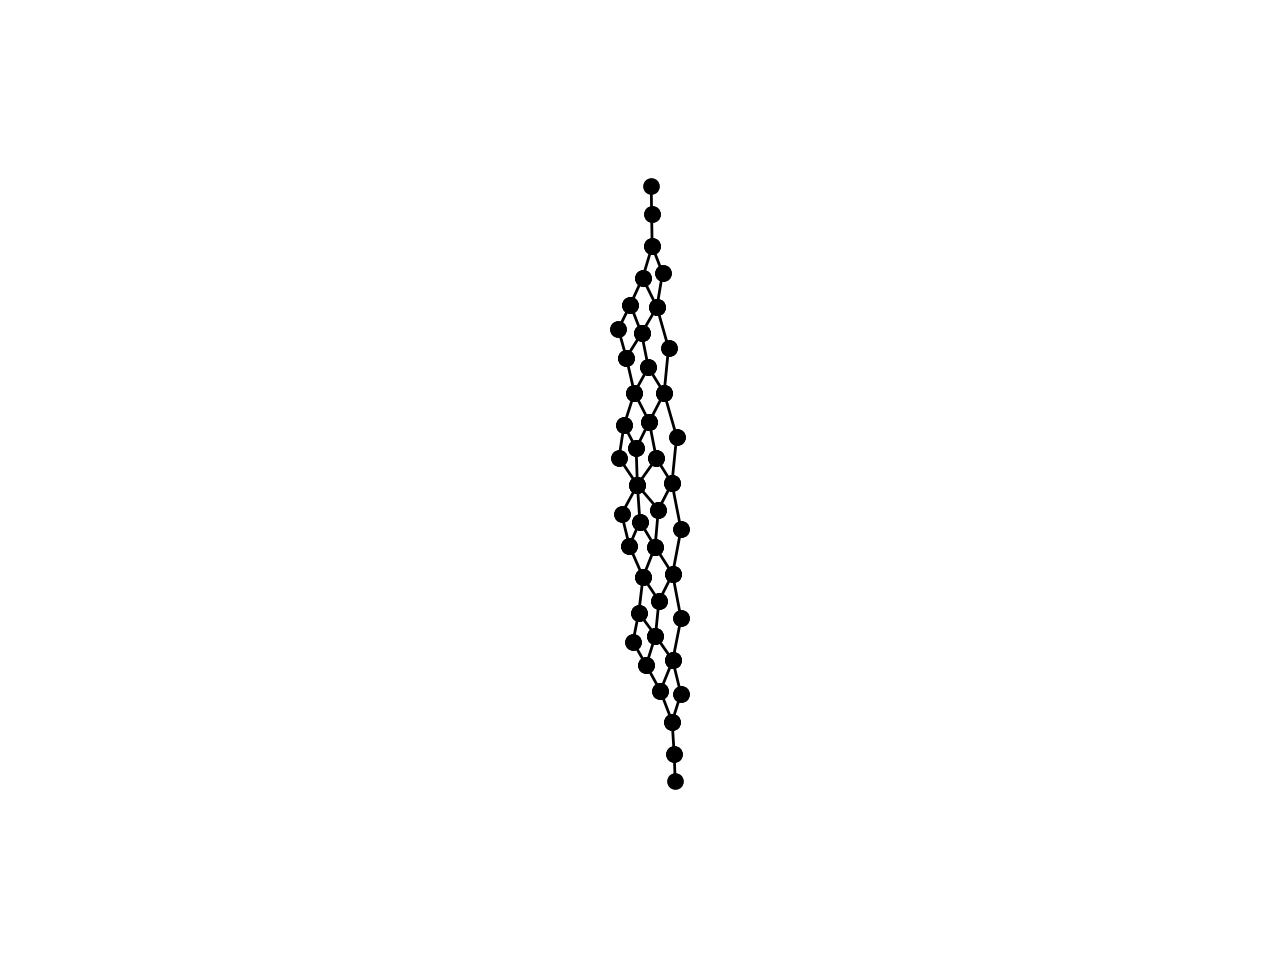

In [12]:
a = g.evolve(dim=30, magnetic=True)